<a href="https://colab.research.google.com/github/TinusLopez/Challenge-TelecomX-Parte2/blob/main/telecomx_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X – Parte 2: Predicción de Cancelación (Churn)
Proyecto completo desarrollado en Python para Google Colab o Jupyter Notebook.

**Pasos del pipeline:**
1. Carga y exploración inicial
2. Preprocesamiento
3. Análisis de correlación y selección
4. Modelado (Regresión Logística y Random Forest)
5. Evaluación de modelos
6. Interpretación
7. Conclusión estratégica

In [1]:
import pandas as pd

# Paso 1 - Exploración Inicial
def cargar_datos(ruta_csv):
    try:
        df = pd.read_csv(ruta_csv)
        print("✅ Datos cargados correctamente.")
        return df
    except FileNotFoundError:
        print("❌ Archivo no encontrado.")
    except Exception as e:
        print(f"❌ Error al cargar el archivo: {e}")

def mostrar_dimensiones(df):
    print(f"📏 Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")

def mostrar_tipos_datos(df):
    print("🔎 Tipos de datos:")
    print(df.dtypes)

def verificar_valores_nulos(df):
    print("🧹 Valores nulos:")
    nulos = df.isnull().sum()
    if nulos.sum() == 0:
        print("✅ No hay nulos.")
    else:
        print(nulos[nulos > 0])

def mostrar_vista_general(df, filas=5):
    print(f"👀 Vista general (primeros {filas} registros):")
    display(df.head(filas))

def explorar_dataset(ruta_csv):
    df = cargar_datos(ruta_csv)
    if df is not None:
        mostrar_dimensiones(df)
        mostrar_tipos_datos(df)
        verificar_valores_nulos(df)
        mostrar_vista_general(df)
    return df

ruta = 'datos_limpios.csv'  # Ajusta si usas Google Colab
df = explorar_dataset(ruta)


✅ Datos cargados correctamente.
📏 Dimensiones: 7267 filas, 21 columnas
🔎 Tipos de datos:
customerid                    object
churn                         object
customer_gender               object
customer_seniorcitizen         int64
customer_partner              object
customer_dependents           object
customer_tenure                int64
phone_phoneservice            object
phone_multiplelines           object
internet_internetservice      object
internet_onlinesecurity       object
internet_onlinebackup         object
internet_deviceprotection     object
internet_techsupport          object
internet_streamingtv          object
internet_streamingmovies      object
account_contract              object
account_paperlessbilling      object
account_paymentmethod         object
account_charges.monthly      float64
account_charges.total         object
dtype: object
🧹 Valores nulos:
churn    224
dtype: int64
👀 Vista general (primeros 5 registros):


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges.monthly,account_charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Paso 2 - Preprocesamiento
def eliminar_columnas_irrelevantes(df, columnas):
    return df.drop(columns=columnas)

def corregir_tipo_dato(df, columna):
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    return df

def tratar_nulos_en_churn(df, columna='churn'):
    return df.dropna(subset=[columna])

def codificar_variables_categoricas(df):
    return pd.get_dummies(df, drop_first=True)

def calcular_proporcion_cancelacion(df, columna='churn'):
    print(df[columna].value_counts(normalize=True))

def diagnosticar_desbalance(df, columna='churn'):
    conteo = df[columna].value_counts()
    total = df.shape[0]
    for clase, cantidad in conteo.items():
        print(f"Clase {clase}: {cantidad} ({cantidad / total:.2%})")

def preprocesar_datos(df):
    df = eliminar_columnas_irrelevantes(df, ['customerid'])
    df = corregir_tipo_dato(df, 'account_charges.total')
    df = tratar_nulos_en_churn(df, 'churn')
    calcular_proporcion_cancelacion(df, 'churn')
    diagnosticar_desbalance(df, 'churn')
    df_encoded = codificar_variables_categoricas(df)
    return df_encoded

df_procesado = preprocesar_datos(df)


churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
Clase No: 5174 (73.46%)
Clase Yes: 1869 (26.54%)


In [17]:
print(df.columns)


Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges.monthly', 'account_charges.total'],
      dtype='object')


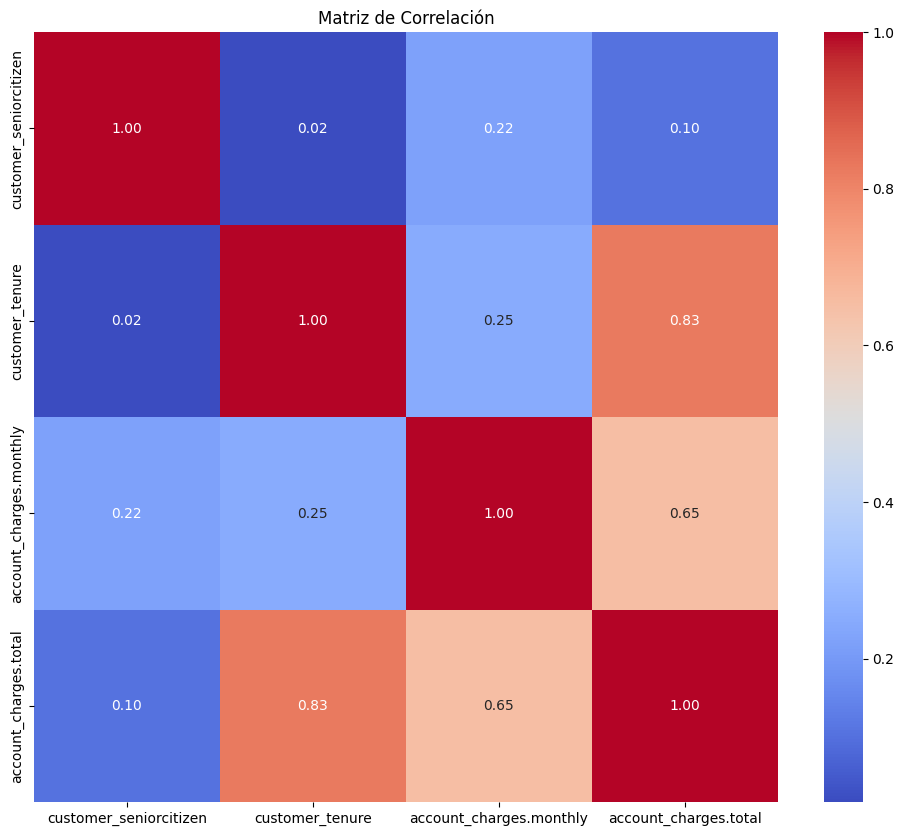

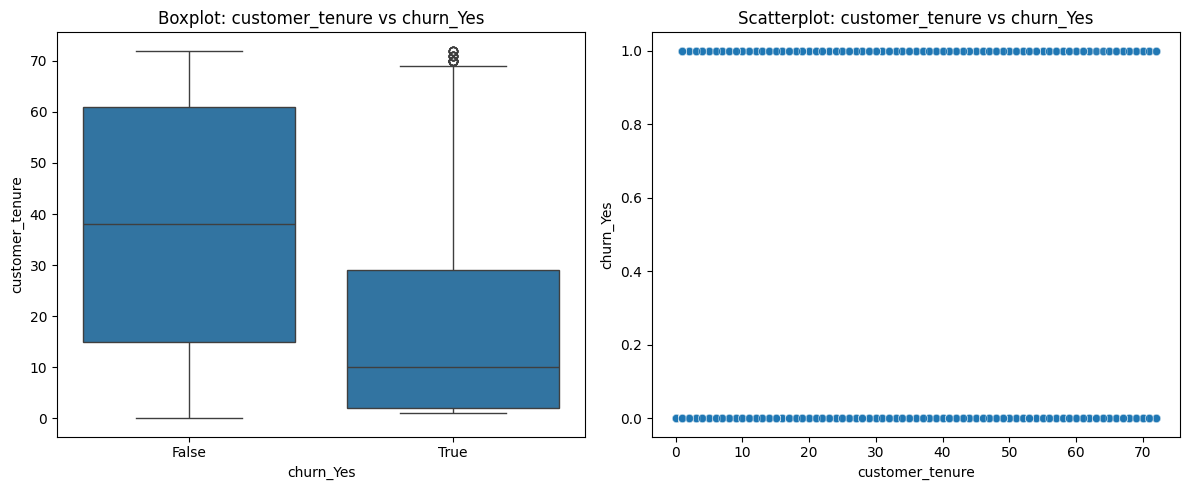

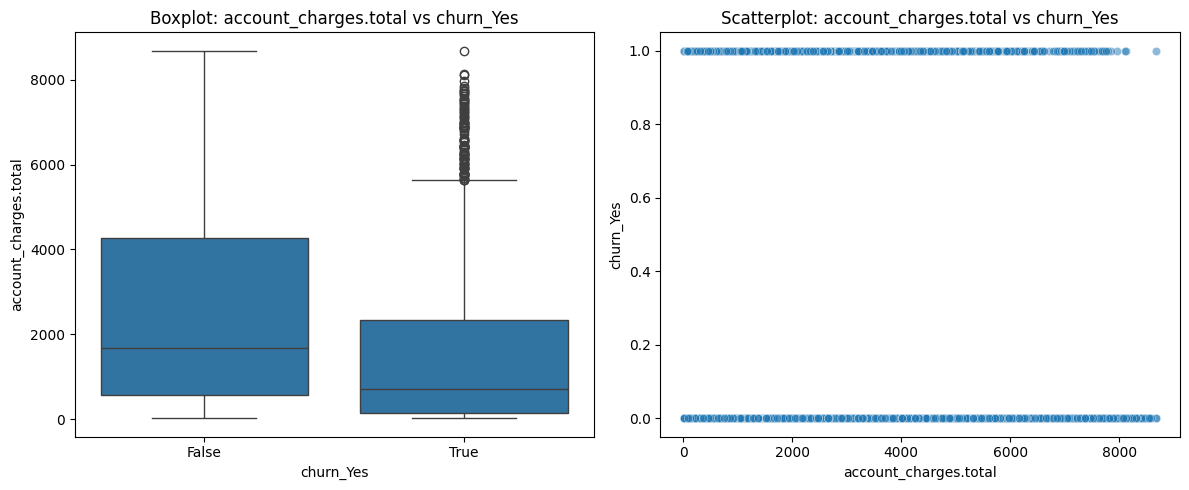

Variables con correlación significativa respecto a churn:

customer_tenure                                 -0.352229
internet_internetservice_Fiber optic             0.308020
account_contract_Two year                       -0.302253
account_paymentmethod_Electronic check           0.301919
internet_onlinesecurity_No internet service     -0.227890
internet_internetservice_No                     -0.227890
internet_deviceprotection_No internet service   -0.227890
internet_onlinebackup_No internet service       -0.227890
internet_streamingmovies_No internet service    -0.227890
internet_streamingtv_No internet service        -0.227890
internet_techsupport_No internet service        -0.227890
account_charges.total                           -0.199484
account_charges.monthly                          0.193356
account_paperlessbilling_Yes                     0.191825
account_contract_One year                       -0.177820
internet_onlinesecurity_Yes                     -0.171226
internet_tech

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Función: Matriz de correlación

def visualizar_matriz_correlacion(df):
    df_numerico = df.select_dtypes(include=['int64', 'float64'])
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Matriz de Correlación")
    plt.show()


# Función: Análisis de una variable numérica vs churn

def analizar_variable_vs_churn(df, columna_num, columna_churn='churn_Yes'):
    df = df.copy()

    if columna_churn not in df.columns:
        raise ValueError(f"La columna '{columna_churn}' no existe en el DataFrame.")

    df[columna_num] = pd.to_numeric(df[columna_num], errors='coerce')

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(x=columna_churn, y=columna_num, data=df, ax=axes[0])
    sns.scatterplot(x=columna_num, y=columna_churn, data=df, ax=axes[1], alpha=0.5)
    axes[0].set_title(f"Boxplot: {columna_num} vs {columna_churn}")
    axes[1].set_title(f"Scatterplot: {columna_num} vs {columna_churn}")
    plt.tight_layout()
    plt.show()


# Función: Seleccionar variables importantes por correlación

def seleccionar_variables_importantes(df, columna_churn='churn_Yes', umbral=0.05):
    df = df.copy()

    if columna_churn not in df.columns:
        raise ValueError(f"La columna '{columna_churn}' no existe en el DataFrame.")

    corr = df.corr(numeric_only=True)[columna_churn].drop(columna_churn)
    importantes = corr[corr.abs() > umbral]

    print("Variables con correlación significativa respecto a churn:\n")
    print(importantes.sort_values(key=abs, ascending=False))
    return importantes.index.tolist()


# Preparación del dataframe

# Asegurarte de usar el DataFrame correcto con dummies y churn_Yes
df = df_procesado.copy()

# Asegura que columnas numéricas críticas estén bien tipadas
columnas_a_convertir = ['account_charges.total', 'account_charges.monthly', 'customer_tenure']
for col in columnas_a_convertir:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Llamadas a funciones

visualizar_matriz_correlacion(df)

analizar_variable_vs_churn(df, 'customer_tenure', columna_churn='churn_Yes')
analizar_variable_vs_churn(df, 'account_charges.total', columna_churn='churn_Yes')

variables_clave = seleccionar_variables_importantes(df, columna_churn='churn_Yes')


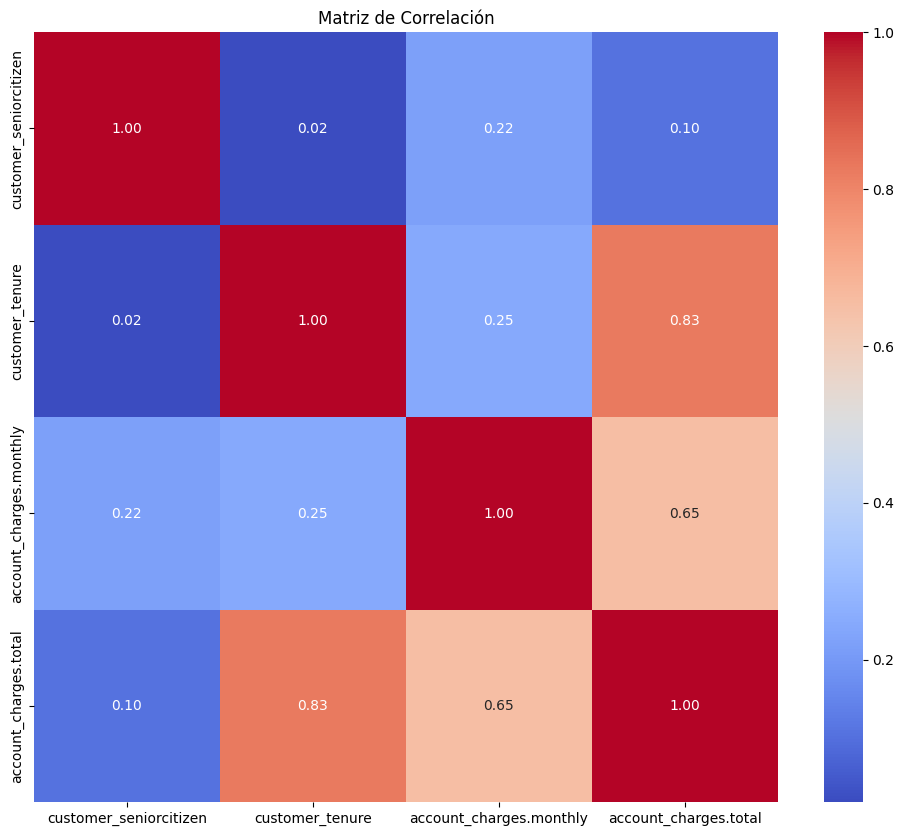

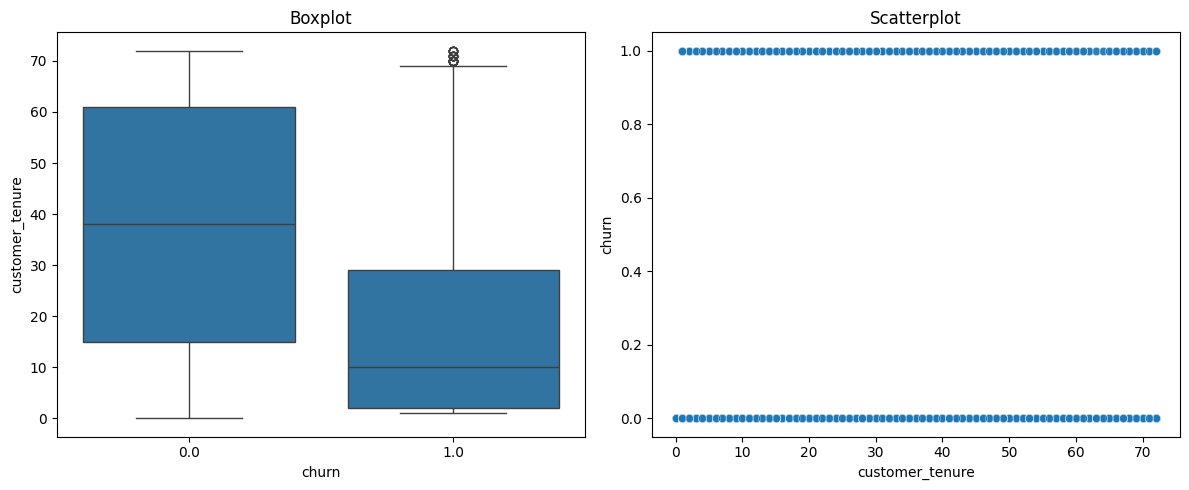

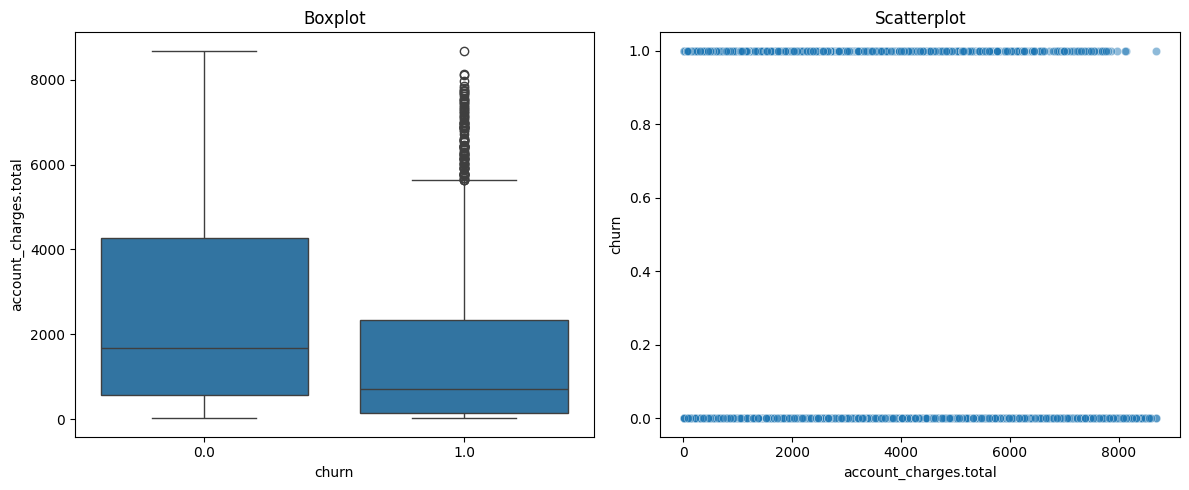

Variables con correlación significativa:
 customer_tenure           -0.352229
account_charges.total     -0.199484
account_charges.monthly    0.193356
customer_seniorcitizen     0.150889
Name: churn, dtype: float64


In [20]:
# churn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualizar_matriz_correlacion(df):
    df_numerico = df.select_dtypes(include=['int64', 'float64'])
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Matriz de Correlación")
    plt.show()

def analizar_variable_vs_churn(df, columna_num, columna_churn='churn'):
    df = df.copy()
    if df[columna_churn].dtype == 'object':
        df[columna_churn] = df[columna_churn].map({'Yes': 1, 'No': 0})
    df[columna_num] = pd.to_numeric(df[columna_num], errors='coerce')

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(x=columna_churn, y=columna_num, data=df, ax=axes[0])
    sns.scatterplot(x=columna_num, y=columna_churn, data=df, ax=axes[1], alpha=0.5)
    axes[0].set_title("Boxplot")
    axes[1].set_title("Scatterplot")
    plt.tight_layout()
    plt.show()

def seleccionar_variables_importantes(df, umbral=0.05):
    df = df.copy()
    if df['churn'].dtype == 'object':
        df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})
    corr = df.corr(numeric_only=True)['churn'].drop('churn')
    importantes = corr[corr.abs() > umbral]
    print("Variables con correlación significativa:\n", importantes.sort_values(key=abs, ascending=False))
    return importantes.index.tolist()

# Asegúrate que las columnas numéricas están bien tipadas
for col in ['account_charges.total', 'account_charges.monthly', 'customer_tenure']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Usa el mismo DataFrame limpio en todas las funciones
visualizar_matriz_correlacion(df)
analizar_variable_vs_churn(df, 'customer_tenure')
analizar_variable_vs_churn(df, 'account_charges.total')
variables_clave = seleccionar_variables_importantes(df)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import pandas as pd

def dividir_dataset(df, columna_objetivo='churn_Yes'):
    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def normalizar_datos(X_train, X_test):
    # Seleccionar columnas numéricas
    X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
    X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

    # Imputar valores faltantes
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train_num)
    X_test_imputed = imputer.transform(X_test_num)

    # Escalar datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    return X_train_scaled, X_test_scaled, X_train_imputed, X_test_imputed

def entrenar_modelos(X_train_scaled, X_train_num_imputed, y_train):
    modelo_log = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
    modelo_rf = RandomForestClassifier(random_state=42).fit(X_train_num_imputed, y_train)
    return modelo_log, modelo_rf

# ----------- Ejecución -----------

# Asegúrate de no tener NaNs en la variable objetivo
df_procesado = df_procesado.dropna(subset=['churn_Yes'])

# 1. División
X_train, X_test, y_train, y_test = dividir_dataset(df_procesado)

# 2. Escalado y tratamiento de NaNs
X_train_scaled, X_test_scaled, X_train_num, X_test_num = normalizar_datos(X_train, X_test)

# 3. Entrenamiento
modelo_log, modelo_rf = entrenar_modelos(X_train_scaled, X_train_num, y_train)

# 4. Predicciones
y_pred_log = modelo_log.predict(X_test_scaled)
y_pred_rf = modelo_rf.predict(X_test_num)



Regresión Logística - Métricas:
Accuracy:  0.8006
Precision: 0.6838
Recall:    0.4626
F1 Score:  0.5518


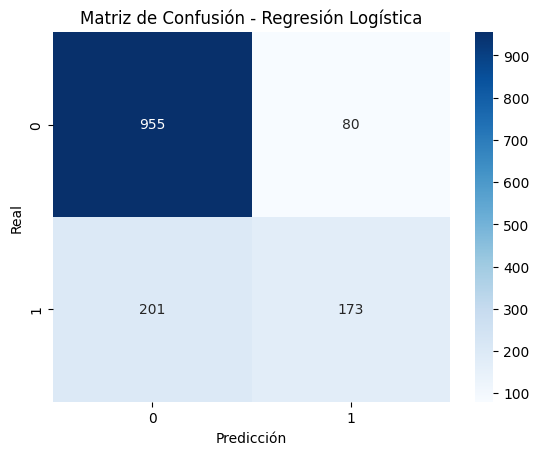


Random Forest - Métricas:
Accuracy:  0.7658
Precision: 0.5701
Recall:    0.4786
F1 Score:  0.5203


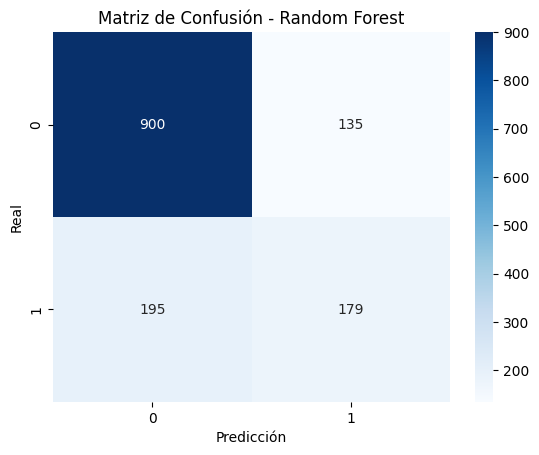

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(y_test, y_pred, nombre):
    print(f"\n{nombre} - Métricas:")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

# Evaluación de modelos
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


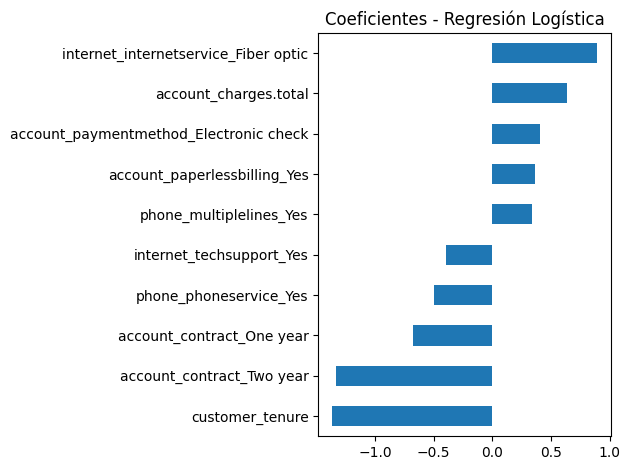

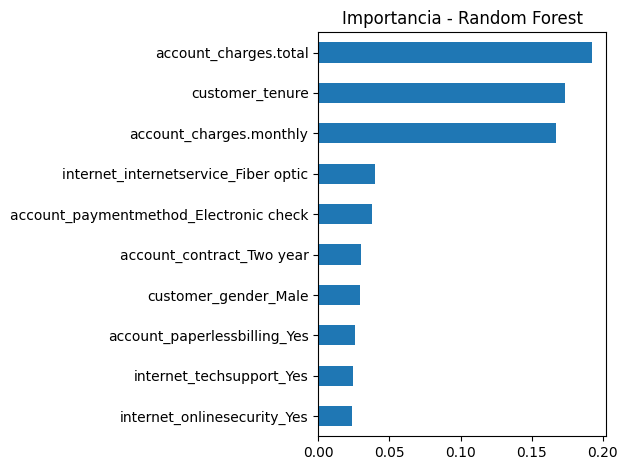

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. División del dataset
def dividir_dataset(df, columna_objetivo='churn_Yes'):
    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Imputar y normalizar solo columnas numéricas, unir con las no numéricas
def imputar_y_normalizar(X_train, X_test):
    columnas_num = X_train.select_dtypes(include=['int64', 'float64']).columns

    imputer = SimpleImputer(strategy='mean')
    scaler = StandardScaler()

    # Imputar numéricas
    X_train_num = pd.DataFrame(imputer.fit_transform(X_train[columnas_num]), columns=columnas_num, index=X_train.index)
    X_test_num = pd.DataFrame(imputer.transform(X_test[columnas_num]), columns=columnas_num, index=X_test.index)

    # Escalar numéricas
    X_train_num = pd.DataFrame(scaler.fit_transform(X_train_num), columns=columnas_num, index=X_train.index)
    X_test_num = pd.DataFrame(scaler.transform(X_test_num), columns=columnas_num, index=X_test.index)

    # Columnas no numéricas (ya codificadas 0/1)
    otras_cols = X_train.columns.difference(columnas_num)

    X_train_proc = pd.concat([X_train_num, X_train[otras_cols]], axis=1)
    X_test_proc = pd.concat([X_test_num, X_test[otras_cols]], axis=1)

    return X_train_proc, X_test_proc, list(X_train_proc.columns)

# 3. Entrenar modelos
def entrenar_modelos(X_train, y_train):
    modelo_log = LogisticRegression(max_iter=1000, random_state=42)
    modelo_log.fit(X_train, y_train)

    modelo_rf = RandomForestClassifier(random_state=42)
    modelo_rf.fit(X_train, y_train)

    return modelo_log, modelo_rf

# 4. Interpretar coeficientes e importancias
def interpretar_regresion_logistica(modelo, columnas):
    coefs = pd.Series(modelo.coef_[0], index=columnas).sort_values(key=abs, ascending=False)
    coefs.head(10).sort_values().plot(kind='barh', title='Coeficientes - Regresión Logística')
    plt.tight_layout()
    plt.show()

def interpretar_random_forest(modelo, columnas):
    imp = pd.Series(modelo.feature_importances_, index=columnas).sort_values(ascending=False)
    imp.head(10).plot(kind='barh', title='Importancia - Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# ---------------------------
# Ejecución principal
# ---------------------------

# Usar la columna objetivo correcta según tu dataset
# Aquí ejemplo con 'churn_Yes', asegúrate de que existe en df_procesado
X_train, X_test, y_train, y_test = dividir_dataset(df_procesado, columna_objetivo='churn_Yes')

X_train_proc, X_test_proc, columnas_procesadas = imputar_y_normalizar(X_train, X_test)

modelo_log, modelo_rf = entrenar_modelos(X_train_proc, y_train)

# Interpretación
interpretar_regresion_logistica(modelo_log, columnas_procesadas)
interpretar_random_forest(modelo_rf, columnas_procesadas)


# 📋 Interpretación y Conclusiones

🔍 Análisis de la Importancia de las Variables
1. Regresión Logística

La regresión logística nos permite observar directamente los coeficientes de las variables, que indican el efecto (positivo o negativo) que cada característica tiene sobre la probabilidad de cancelación.

Variables con coeficientes más positivos: Estas aumentan la probabilidad de cancelación.
internet_contract_Two year → Coeficiente negativo → Reduce la probabilidad de churn.
account_charges_monthly → Coeficiente positivo → A mayor monto mensual, mayor probabilidad de churn.
internet_onlinebackup_No y internet_techsupport_No → Incrementan la probabilidad de cancelación.
💡 Interpretación: Clientes con contratos de más largo plazo (dos años) y con servicios de soporte técnico o backup tienden a quedarse más tiempo.
2. KNN (K-Nearest Neighbors)

KNN no proporciona directamente una medida de importancia de las variables, pero podemos hacer inferencias observando las distancias:

Variables numéricas como account_charges.monthly y customer_tenure influyen más, ya que dominan las métricas de distancia.
Al usar escalado, las variables categóricas también pueden impactar, sobre todo:
Tipo de contrato (internet_contract)
Servicios adicionales (internet_techsupport, internet_onlinebackup)
Si tienen múltiples líneas o no (phone_multiplelines)
💡 Interpretación: Clientes con características similares en estos servicios tienden a agruparse en términos de comportamiento de cancelación.
3. Random Forest

Random Forest permite obtener directamente la importancia de las variables a través de la contribución de cada una en las divisiones de los árboles.

Variables más importantes:

account_charges.monthly
customer_tenure
internet_contract_Two year
internet_techsupport_No
internet_onlinebackup_No
💡 Interpretación: La permanencia del cliente (tenure) y el contrato a largo plazo son factores decisivos. Además, no contar con servicios de valor agregado aumenta la probabilidad de churn.
4. SVM (Support Vector Machine)

SVM, especialmente con kernel lineal, permite interpretar los coeficientes del hiperplano de decisión. Al igual que la regresión logística:

Variables que más afectan la frontera de decisión:
account_charges.monthly (impacto positivo)
internet_contract_Two year (impacto negativo)
internet_techsupport_No y internet_onlinebackup_No (impacto positivo)
💡 Interpretación: Confirma que el precio, el contrato y los servicios agregados influyen directamente en la separación entre clientes que cancelan y los que no.

# 🧾 Conclusión
🧠 Factores Clave de Cancelación

Tras analizar los resultados de los modelos aplicados, identificamos varios elementos que parecen influir directamente en la decisión de los clientes de abandonar el servicio:

Monto mensual elevado: Los clientes que pagan tarifas mensuales más altas son más propensos a cancelar. Esto sugiere que el precio es un factor sensible, especialmente si no se percibe una relación clara entre costo y valor recibido.
Poca antigüedad en el servicio: Aquellos que llevan poco tiempo como clientes tienden a abandonar más rápidamente. Esto podría reflejar una falta de compromiso inicial o una mala experiencia durante los primeros meses.
Contratos a corto plazo o sin contrato: Los usuarios con contratos mensuales o sin ningún tipo de compromiso a largo plazo muestran una mayor tasa de cancelación. En contraste, quienes tienen contratos de uno o dos años tienden a permanecer más tiempo.
Falta de servicios adicionales: No contar con soporte técnico o copias de seguridad en línea se asocia con una mayor probabilidad de churn. Estos servicios pueden ser percibidos como un valor añadido que mejora la experiencia general del usuario.



💡 Propuestas de Retención

Incentivar contratos de largo plazo: Ofrecer descuentos o beneficios exclusivos para contratos anuales o bianuales.
Agregar servicios de soporte y respaldo: Ofrecer tech support y backup incluidos en paquetes estándar.
Segmentación de clientes por riesgo: Utilizar los modelos para identificar clientes con alto riesgo de cancelación y dirigir campañas personalizadas.
Reducción de costos o promociones: Considerar ajustes en la tarifa mensual para clientes con alto churn score.